In [1]:
import pandas as pd #data manipulation
import numpy as np #data manipulation
from numpy import mean
from numpy import std
#from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
#from sklearn.datasets import make_classification
#from sklearn.model_selection import KFold
import re #regex
import nltk #text processing
import matplotlib #visualisation
import matplotlib.cm as cm #visualisation
import matplotlib.pyplot as plt #visualisation
import seaborn as sns #visualisation
import warnings #ignore warnings
import string #string operations
import collections #for counter
warnings.filterwarnings('ignore') #ignore warnings
%matplotlib inline

In [2]:
#importing CSV
data = pd.read_csv('cleanprep.csv',names=['Date','Tweeter','Tweet','Polarity Rate','Sensitivity Rate'])
data.head(6)

,Date,Tweeter,Tweet,Polarity Rate,Sensitivity Rate
0,2018-07-11 19:35:15.363270,b'tj',"b""Next two weeks prob v boring (climb up to 9k...",0.007273,0.590909
1,2018-07-11 19:35:15.736769,b'Kool_Kheart',b'@Miss_rinola But you\xe2\x80\x99ve heard abo...,0.000000,0.000000
2,2018-07-11 19:35:15.744769,b'Gary Lang',b'Duplicate skilled traders automatically with...,0.625000,0.500000
3,2018-07-11 19:35:15.867339,b'Jobs in Fintech',b'Project Manager - Technical - FinTech - Cent...,0.000000,0.175000
4,2018-07-11 19:35:16.021448,b'ERC20',"b'Coinbase App Downloads Drop, Crypto Hype Fad...",0.333333,0.500000
5,2018-07-11 19:35:16.687237,b'Lake_Ocean_Pond',"b'If you don\xe2\x80\x99t understand Bitcoin, ...",0.000000,0.000000


In [3]:
#importing BTC Data set
BTCdata = pd.read_csv('btcSave2.csv')
BTCdata.head(6)

,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
0,2018-07-10 01:00,6666.75,6683.90,6635.59,6669.73,281.73,1875693.72,6657.70
1,2018-07-10 02:00,6662.44,6674.60,6647.00,6647.00,174.10,1160103.29,6663.38
2,2018-07-10 03:00,6652.52,6662.82,6621.99,6632.53,231.41,1536936.22,6641.70
3,2018-07-10 04:00,6631.17,6655.48,6625.54,6635.92,120.38,799154.77,6638.52
4,2018-07-10 05:00,6632.81,6651.06,6627.64,6640.57,94.00,624289.31,6641.32
5,2018-07-10 06:00,6640.12,6653.46,6620.00,6620.10,133.22,883912.06,6635.05


In [4]:
#DATA CLEANING

In [5]:
#cleaning up "tweet" column to remove any special characters
def clean_data(data):
    # function to clean tweet text by removing links, special characters
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", data).split())

data.head(5)

,Date,Tweeter,Tweet,Polarity Rate,Sensitivity Rate
0,2018-07-11 19:35:15.363270,b'tj',"b""Next two weeks prob v boring (climb up to 9k...",0.007273,0.590909
1,2018-07-11 19:35:15.736769,b'Kool_Kheart',b'@Miss_rinola But you\xe2\x80\x99ve heard abo...,0.000000,0.000000
2,2018-07-11 19:35:15.744769,b'Gary Lang',b'Duplicate skilled traders automatically with...,0.625000,0.500000
3,2018-07-11 19:35:15.867339,b'Jobs in Fintech',b'Project Manager - Technical - FinTech - Cent...,0.000000,0.175000
4,2018-07-11 19:35:16.021448,b'ERC20',"b'Coinbase App Downloads Drop, Crypto Hype Fad...",0.333333,0.500000


In [6]:
#Converting Date column to format MM/DD/YYYY for analysis purposes
data['Date']= pd.to_datetime(data['Date'])
data['Date']= data['Date'].dt.strftime("%m/%d/%y %H:00:00")
data.head(6)

,Date,Tweeter,Tweet,Polarity Rate,Sensitivity Rate
0,07/11/18 19:00:00,b'tj',"b""Next two weeks prob v boring (climb up to 9k...",0.007273,0.590909
1,07/11/18 19:00:00,b'Kool_Kheart',b'@Miss_rinola But you\xe2\x80\x99ve heard abo...,0.000000,0.000000
2,07/11/18 19:00:00,b'Gary Lang',b'Duplicate skilled traders automatically with...,0.625000,0.500000
3,07/11/18 19:00:00,b'Jobs in Fintech',b'Project Manager - Technical - FinTech - Cent...,0.000000,0.175000
4,07/11/18 19:00:00,b'ERC20',"b'Coinbase App Downloads Drop, Crypto Hype Fad...",0.333333,0.500000
5,07/11/18 19:00:00,b'Lake_Ocean_Pond',"b'If you don\xe2\x80\x99t understand Bitcoin, ...",0.000000,0.000000


In [7]:
#Converting Date column to format MM/DD/YYYY for analysis purposes
BTCdata['Timestamp']= pd.to_datetime(BTCdata['Timestamp'])
BTCdata['Timestamp']= BTCdata['Timestamp'].dt.strftime("%m/%d/%y %H:00:00")
BTCdata.head(6)

,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
0,07/10/18 01:00:00,6666.75,6683.90,6635.59,6669.73,281.73,1875693.72,6657.70
1,07/10/18 02:00:00,6662.44,6674.60,6647.00,6647.00,174.10,1160103.29,6663.38
2,07/10/18 03:00:00,6652.52,6662.82,6621.99,6632.53,231.41,1536936.22,6641.70
3,07/10/18 04:00:00,6631.17,6655.48,6625.54,6635.92,120.38,799154.77,6638.52
4,07/10/18 05:00:00,6632.81,6651.06,6627.64,6640.57,94.00,624289.31,6641.32
5,07/10/18 06:00:00,6640.12,6653.46,6620.00,6620.10,133.22,883912.06,6635.05


In [8]:
#removing columns of High, Low, Volume (BTC), Volume (Currency)
BTCdata.drop(['High','Low','Volume (BTC)','Volume (Currency)'], axis = 1, inplace = True)
BTCdata.head(6)

,Timestamp,Open,Close,Weighted Price
0,07/10/18 01:00:00,6666.75,6669.73,6657.70
1,07/10/18 02:00:00,6662.44,6647.00,6663.38
2,07/10/18 03:00:00,6652.52,6632.53,6641.70
3,07/10/18 04:00:00,6631.17,6635.92,6638.52
4,07/10/18 05:00:00,6632.81,6640.57,6641.32
5,07/10/18 06:00:00,6640.12,6620.10,6635.05


In [9]:
#Renaming Timestamp name to 'Date'
BTCdata.columns = ['Date','Open','Close','Weighted Price']
BTCdata.head(6)

,Date,Open,Close,Weighted Price
0,07/10/18 01:00:00,6666.75,6669.73,6657.70
1,07/10/18 02:00:00,6662.44,6647.00,6663.38
2,07/10/18 03:00:00,6652.52,6632.53,6641.70
3,07/10/18 04:00:00,6631.17,6635.92,6638.52
4,07/10/18 05:00:00,6632.81,6640.57,6641.32
5,07/10/18 06:00:00,6640.12,6620.10,6635.05


In [10]:
#removing all values for Date = 07/10/18
BTCdata = BTCdata.drop([0,1,2,3,4,5,6,7,8,9,10],axis=0)
BTCdata = BTCdata.drop([11,12,13,14,15,16,17,18,19,20,21,22],axis=0)
BTCdata.head(10)

,Date,Open,Close,Weighted Price
23,07/11/18 00:00:00,6371.57,6299.46,6309.50
24,07/11/18 01:00:00,6304.45,6387.73,6353.06
25,07/11/18 02:00:00,6387.39,6367.45,6377.03
26,07/11/18 03:00:00,6367.85,6363.77,6362.12
27,07/11/18 04:00:00,6361.98,6333.75,6356.38
28,07/11/18 05:00:00,6335.95,6347.12,6343.43
29,07/11/18 06:00:00,6347.18,6337.94,6325.29
30,07/11/18 07:00:00,6339.77,6310.75,6307.04
31,07/11/18 08:00:00,6307.01,6348.35,6333.38
32,07/11/18 09:00:00,6348.43,6367.25,6359.53


In [11]:
#removing Tweet and Tweeter as they do not have any influence to the data
data.drop(['Tweeter'], axis = 1, inplace = True)
data.head(6)

,Date,Tweet,Polarity Rate,Sensitivity Rate
0,07/11/18 19:00:00,"b""Next two weeks prob v boring (climb up to 9k...",0.007273,0.590909
1,07/11/18 19:00:00,b'@Miss_rinola But you\xe2\x80\x99ve heard abo...,0.000000,0.000000
2,07/11/18 19:00:00,b'Duplicate skilled traders automatically with...,0.625000,0.500000
3,07/11/18 19:00:00,b'Project Manager - Technical - FinTech - Cent...,0.000000,0.175000
4,07/11/18 19:00:00,"b'Coinbase App Downloads Drop, Crypto Hype Fad...",0.333333,0.500000
5,07/11/18 19:00:00,"b'If you don\xe2\x80\x99t understand Bitcoin, ...",0.000000,0.000000


In [12]:
print('Dataset has {0} features and {1} observations'.format(data.shape[1], data.shape[0]))
print('Dataset has {0} features and {1} observations'.format(BTCdata.shape[1], BTCdata.shape[0]))

Dataset has 4 features and 1413001 observations
Dataset has 4 features and 314 observations


{'whiskers': [<matplotlib.lines.Line2D at 0x7f3a586d0b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3a586dd390>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3a586d0710>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3a586ddc50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3a586e70d0>],
 'means': []}

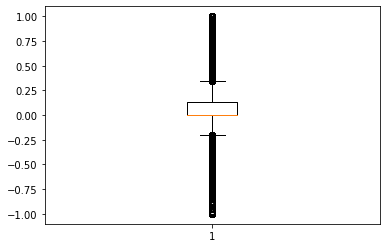

In [13]:
#Boxplot for individual columns to understand range of each variable
matplotlib.pyplot.boxplot(data['Polarity Rate'], notch=None, vert=None, patch_artist=None, widths=None)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3a585e4210>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3a585e4a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3a585d8ed0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3a585ee390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3a585ee7d0>],
 'means': []}

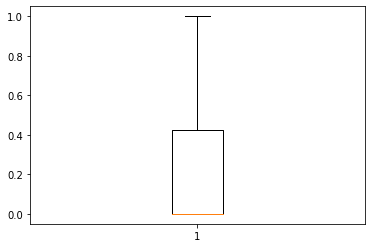

In [14]:
matplotlib.pyplot.boxplot(data['Sensitivity Rate'], notch=None, vert=None, patch_artist=None, widths=None)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3a58568310>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3a58568b90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3a58560fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3a58574490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3a585748d0>],
 'means': []}

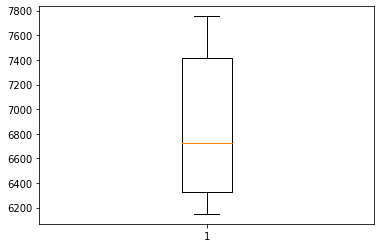

In [15]:
matplotlib.pyplot.boxplot(BTCdata['Open'], notch=None, vert=None, patch_artist=None, widths=None)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3a5847c610>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3a5847ce90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3a5847c2d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3a58486790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3a58486bd0>],
 'means': []}

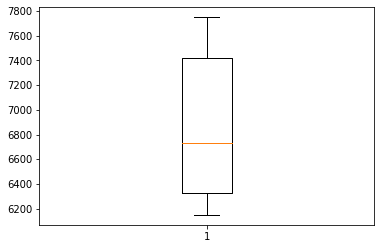

In [16]:
matplotlib.pyplot.boxplot(BTCdata['Close'], notch=None, vert=None, patch_artist=None, widths=None)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3a58407a50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3a58411210>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3a584076d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3a58411ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3a58411f10>],
 'means': []}

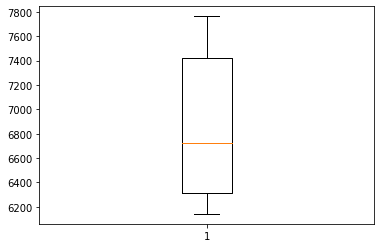

In [17]:
matplotlib.pyplot.boxplot(BTCdata['Weighted Price'], notch=None, vert=None, patch_artist=None, widths=None)

In [18]:
#DATA CLEANING END

In [19]:
#EXPLORATORY DATA ANALYSIS (EDA)

In [20]:
#merging two datasets together
df = pd.merge(data,BTCdata,how='left',left_on='Date',right_on='Date')
df.head()

,Date,Tweet,Polarity Rate,Sensitivity Rate,Open,Close,Weighted Price
0,07/11/18 19:00:00,"b""Next two weeks prob v boring (climb up to 9k...",0.007273,0.590909,6353.73,6342.96,6348.41
1,07/11/18 19:00:00,b'@Miss_rinola But you\xe2\x80\x99ve heard abo...,0.000000,0.000000,6353.73,6342.96,6348.41
2,07/11/18 19:00:00,b'Duplicate skilled traders automatically with...,0.625000,0.500000,6353.73,6342.96,6348.41
3,07/11/18 19:00:00,b'Project Manager - Technical - FinTech - Cent...,0.000000,0.175000,6353.73,6342.96,6348.41
4,07/11/18 19:00:00,"b'Coinbase App Downloads Drop, Crypto Hype Fad...",0.333333,0.500000,6353.73,6342.96,6348.41


In [21]:
df = df.groupby('Date').mean()
df

,Polarity Rate,Sensitivity Rate,Open,Close,Weighted Price
Date,,,,,
07/11/18 19:00:00,0.109705,0.187557,6353.73,6342.96,6348.41
07/11/18 20:00:00,0.102657,0.216148,6342.97,6350.00,6315.33
07/11/18 21:00:00,0.098004,0.218612,6352.99,6356.48,6359.53
07/11/18 22:00:00,0.096688,0.231342,6350.85,6361.93,6354.12
07/11/18 23:00:00,0.103997,0.217739,6362.36,6368.78,6368.23
...,...,...,...,...,...
07/24/18 04:00:00,0.121358,0.236000,NaN,NaN,NaN
07/24/18 05:00:00,0.095163,0.216924,NaN,NaN,NaN
07/24/18 06:00:00,0.088992,0.220173,NaN,NaN,NaN


In [22]:
#dropping all rows where 'Open', 'Close', and 'Weighted Price' have a value of 'NaN'
df.dropna(subset=['Open'],inplace=True)
df

,Polarity Rate,Sensitivity Rate,Open,Close,Weighted Price
Date,,,,,
07/11/18 19:00:00,0.109705,0.187557,6353.73,6342.96,6348.41
07/11/18 20:00:00,0.102657,0.216148,6342.97,6350.00,6315.33
07/11/18 21:00:00,0.098004,0.218612,6352.99,6356.48,6359.53
07/11/18 22:00:00,0.096688,0.231342,6350.85,6361.93,6354.12
07/11/18 23:00:00,0.103997,0.217739,6362.36,6368.78,6368.23
...,...,...,...,...,...
07/23/18 21:00:00,0.107282,0.235636,7746.99,7706.00,7729.06
07/23/18 22:00:00,0.094493,0.271796,7699.13,7750.09,7724.30
07/23/18 23:00:00,0.074246,0.231640,7754.57,7722.32,7749.63


In [23]:
#Display data types
df.dtypes

Polarity Rate       float64
Sensitivity Rate    float64
Open                float64
Close               float64
Weighted Price      float64
dtype: object

In [24]:
print('Dataset has {0} features and {1} observations'.format(df.shape[1], df.shape[0]))

Dataset has 5 features and 295 observations


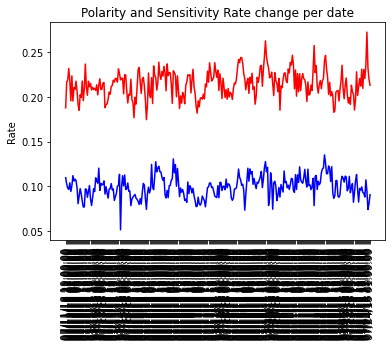

In [25]:
#plotting graph for comparison between Polarity Rate and Sensitivity Rate
plt.plot(df.index,df['Polarity Rate'],'blue')
plt.plot(df.index,df['Sensitivity Rate'],'red')
plt.title('Polarity and Sensitivity Rate change per date')
plt.xticks(rotation='vertical')
plt.ylabel('Rate')
plt.show()

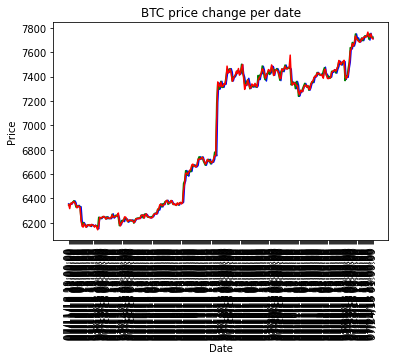

In [26]:
#Plotting graph for comparison between Open Price, Close Price, and Weighted Price. It will help us compare it to the rate changes found above
plt.plot(df.index,df['Open'],'blue')
plt.plot(df.index,df['Close'],'green')
plt.plot(df.index,df['Weighted Price'],'red')
plt.title('BTC price change per date')
plt.xticks(rotation='vertical')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

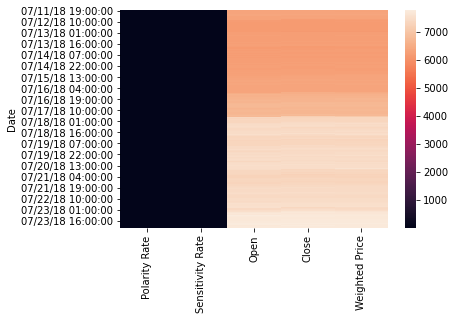

In [27]:
#Same measure done through heat map
pt=sns.heatmap(df)

In [28]:
# Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values
df.describe()

,Polarity Rate,Sensitivity Rate,Open,Close,Weighted Price
count,295.000000,295.000000,295.000000,295.000000,295.000000
mean,0.099569,0.214051,6913.445593,6918.193424,6916.565932
std,0.012108,0.014994,564.454789,565.461902,565.868731
min,0.051695,0.174330,6149.110000,6149.110000,6141.240000
25%,0.091504,0.203351,6291.335000,6289.995000,6293.130000
50%,0.099247,0.214576,7276.700000,7276.990000,7278.190000
75%,0.106705,0.223888,7422.645000,7424.130000,7425.630000
max,0.135088,0.271796,7754.570000,7750.090000,7764.460000


In [29]:
#Generating correlation statistics
df.corr()

,Polarity Rate,Sensitivity Rate,Open,Close,Weighted Price
Polarity Rate,1.000000,0.372817,0.175708,0.175021,0.174373
Sensitivity Rate,0.372817,1.000000,0.199377,0.197966,0.200544
Open,0.175708,0.199377,1.000000,0.997226,0.998365
Close,0.175021,0.197966,0.997226,1.000000,0.999433
Weighted Price,0.174373,0.200544,0.998365,0.999433,1.000000


<AxesSubplot:xlabel='Polarity Rate', ylabel='Weighted Price'>

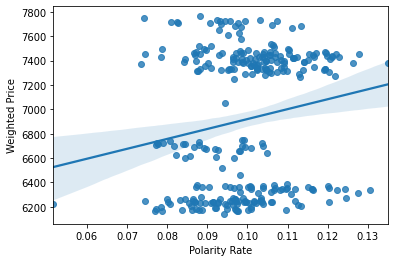

In [30]:
sns.regplot(x=df["Polarity Rate"], y=df["Weighted Price"])

<AxesSubplot:xlabel='Sensitivity Rate', ylabel='Weighted Price'>

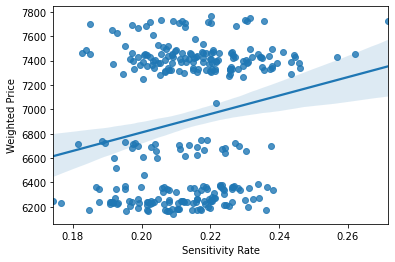

In [31]:
sns.regplot(x=df["Sensitivity Rate"], y=df["Weighted Price"])

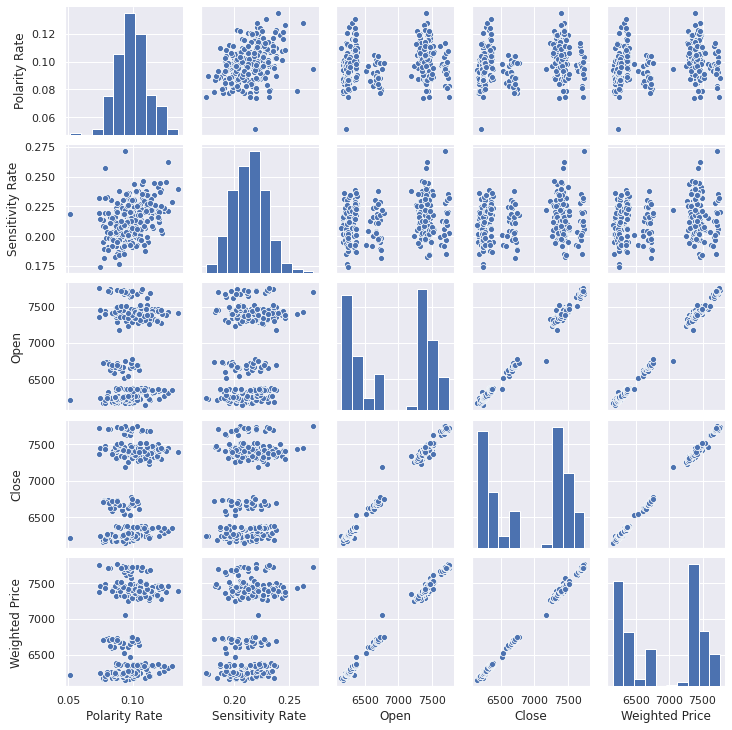

In [32]:
sns.set()
cols = ['Polarity Rate','Sensitivity Rate','Open','Close','Weighted Price']
sns.pairplot(df[cols],height=2)
plt.show()

In [33]:
#EDA END

In [34]:
#Modeling

In [35]:
#df_train = pd.concat([train_cat_c,train_num],axis=1)
#df_train.info()

In [36]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler().fit(df[['Polarity Rate','Sensitivity Rate','Open','Close','Weighted Price']].astype('float32'))
df_scaled = minmax.transform(df[['Polarity Rate','Sensitivity Rate','Open','Close','Weighted Price']].astype('float32'))
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()

,0,1,2,3,4
0,0.695621,0.135711,0.127453,0.121082,0.127629
1,0.611105,0.429055,0.120751,0.125479,0.107250
2,0.555312,0.454335,0.126992,0.129527,0.134479
3,0.539534,0.584943,0.125659,0.132931,0.131147
4,0.627175,0.445375,0.132828,0.137210,0.139839


In [37]:
#Taking Polarity Rate as target variable
y = df['Polarity Rate']

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold

X_train,X_test,Y_train,Y_test = train_test_split(df_scaled,y,test_size=0.25,train_size=0.75,random_state=1)

In [39]:
X_train.shape

(221, 5)

In [40]:
Y_train.shape

(221,)

In [41]:
X_test.shape

(74, 5)

In [42]:
Y_test.shape

(74,)

In [43]:
#CLASSIFIERS

In [44]:
#CLASSIFIER 1: VADER
#Vader:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

data['VADER Score'] = data['Tweet'].apply(lambda Description: sid.polarity_scores(Description))
data.head(6)

,Date,Tweet,Polarity Rate,Sensitivity Rate,VADER Score
0,07/11/18 19:00:00,"b""Next two weeks prob v boring (climb up to 9k...",0.007273,0.590909,"{'neg': 0.095, 'neu': 0.785, 'pos': 0.12, 'com..."
1,07/11/18 19:00:00,b'@Miss_rinola But you\xe2\x80\x99ve heard abo...,0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,07/11/18 19:00:00,b'Duplicate skilled traders automatically with...,0.625000,0.500000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,07/11/18 19:00:00,b'Project Manager - Technical - FinTech - Cent...,0.000000,0.175000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,07/11/18 19:00:00,"b'Coinbase App Downloads Drop, Crypto Hype Fad...",0.333333,0.500000,"{'neg': 0.123, 'neu': 0.877, 'pos': 0.0, 'comp..."
5,07/11/18 19:00:00,"b'If you don\xe2\x80\x99t understand Bitcoin, ...",0.000000,0.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [45]:
data['compound'] = data['VADER Score'].apply(lambda score_dict: score_dict['compound'])
data['Sentiment_type'] = ''
data.loc[data.compound>0,'Sentiment_type']='POSITIVE'
data.loc[data.compound==0,'Sentiment_type']='NEUTRAL'
data.loc[data.compound<0,'Sentiment_type']='NEGATIVE'

Text(0, 0.5, 'Number of Tweets')

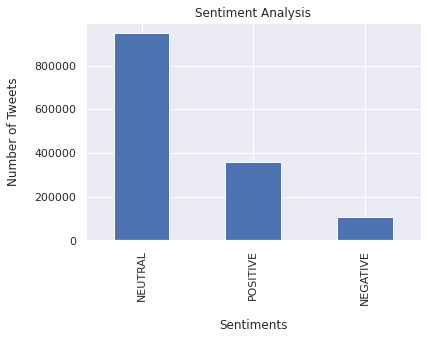

In [46]:
data.Sentiment_type.value_counts().plot(kind='bar',title='Sentiment Analysis')
plt.xlabel('Sentiments',labelpad=14)
plt.ylabel('Number of Tweets',labelpad=14)